In [90]:
import pandas as pd

In [91]:
df=pd.read_csv('G:/내 드라이브/PROJECT/csv/Bank Customer Churn Prediction.csv')
df

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,15569892,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,15682355,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [92]:
# 신용등급에 따라 신용점수 구간 나누기
bins=[300,600,660,720,780,850]
labels=['Very poor','Poor','Fair','Good','Excellent']

In [93]:
df['section of credit_score'] = pd.cut(
    df['credit_score'], bins=bins, labels=labels,right=True)

In [95]:
df

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,section of credit_score
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1,Poor
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,Poor
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,Very poor
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0,Fair
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,Excellent
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,771,France,Male,39,5,0.00,2,1,0,96270.64,0,Good
9996,15569892,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,Very poor
9997,15584532,709,France,Female,36,7,0.00,1,0,1,42085.58,1,Fair
9998,15682355,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,Good


In [96]:
df.insert(df.columns.get_loc('credit_score') + 1,
              'section of credit_score',
              df.pop('section of credit_score'))
df

,customer_id,credit_score,section of credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,Poor,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Poor,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,Very poor,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,Fair,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Excellent,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,771,Good,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,15569892,516,Very poor,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,709,Fair,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,15682355,772,Good,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [97]:
df['section of credit_score'].value_counts()

section of credit_score
Very poor    3066
Poor         2281
Fair         2245
Good         1458
Excellent     950
Name: count, dtype: int64

In [98]:
# 나이대에 따라 나이 나누어서 새로운 변수 만들기
bins = [0, 19, 29, 39, 49, 59, 69, 79, 89, 99]  # 각 구간의 경계값
labels = ['teenager', 'twenties', 'thirties', 'forties', 'fifties', 'sixties','seventies','eighties','nineties']  # 각 구간의 레이블

In [99]:
df['age_group'] = pd.cut(
    df['age'], bins=bins, labels=labels,right=True)
df

,customer_id,credit_score,section of credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,age_group
0,15634602,619,Poor,France,Female,42,2,0.00,1,1,1,101348.88,1,forties
1,15647311,608,Poor,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,forties
2,15619304,502,Very poor,France,Female,42,8,159660.80,3,1,0,113931.57,1,forties
3,15701354,699,Fair,France,Female,39,1,0.00,2,0,0,93826.63,0,thirties
4,15737888,850,Excellent,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,forties
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,771,Good,France,Male,39,5,0.00,2,1,0,96270.64,0,thirties
9996,15569892,516,Very poor,France,Male,35,10,57369.61,1,1,1,101699.77,0,thirties
9997,15584532,709,Fair,France,Female,36,7,0.00,1,0,1,42085.58,1,thirties
9998,15682355,772,Good,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,forties


In [100]:
df.insert(df.columns.get_loc('age') + 1,
              'age_group',
              df.pop('age_group'))
df

,customer_id,credit_score,section of credit_score,country,gender,age,age_group,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,Poor,France,Female,42,forties,2,0.00,1,1,1,101348.88,1
1,15647311,608,Poor,Spain,Female,41,forties,1,83807.86,1,0,1,112542.58,0
2,15619304,502,Very poor,France,Female,42,forties,8,159660.80,3,1,0,113931.57,1
3,15701354,699,Fair,France,Female,39,thirties,1,0.00,2,0,0,93826.63,0
4,15737888,850,Excellent,Spain,Female,43,forties,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,771,Good,France,Male,39,thirties,5,0.00,2,1,0,96270.64,0
9996,15569892,516,Very poor,France,Male,35,thirties,10,57369.61,1,1,1,101699.77,0
9997,15584532,709,Fair,France,Female,36,thirties,7,0.00,1,0,1,42085.58,1
9998,15682355,772,Good,Germany,Male,42,forties,3,75075.31,2,1,0,92888.52,1


In [101]:
# 우선 데이터의 상한선을 찾아 어디서부터 이상치로 판별할 수 있는지 알아본다

print(df['age'].max())

import numpy as np

# 데이터 정렬
data_sorted = np.sort(df['age'])

# 1사분위수(Q1)와 3사분위수(Q3) 계산
Q1 = np.percentile(data_sorted, 25)
Q3 = np.percentile(data_sorted, 75)

# IQR 계산
IQR = Q3 - Q1

# 상한선 계산
upper_bound = Q3 + 1.5 * IQR

print(f"1사분위수 (Q1): {Q1}")
print(f"3사분위수 (Q3): {Q3}")
print(f"IQR: {IQR}")
print(f"상한선: {upper_bound}")

# 상한선 초과 데이터 확인
outliers_above = [x for x in df['age'] if x > upper_bound]
print(f"상한선 초과 데이터: {outliers_above}")

# 상한선을 넘긴 하지만 범위를 지나치게 벗어나지 않음
# 이상치로 간주하지 않는다

92
1사분위수 (Q1): 32.0
3사분위수 (Q3): 44.0
IQR: 12.0
상한선: 62.0
상한선 초과 데이터: [66, 75, 65, 73, 65, 72, 67, 67, 79, 80, 68, 75, 66, 66, 70, 63, 72, 64, 64, 70, 67, 82, 63, 69, 65, 69, 64, 65, 74, 67, 66, 67, 63, 70, 71, 72, 67, 74, 76, 66, 63, 66, 68, 67, 63, 71, 66, 69, 73, 65, 66, 64, 69, 64, 77, 74, 65, 70, 67, 69, 67, 74, 69, 74, 74, 64, 63, 63, 70, 74, 65, 72, 77, 66, 65, 74, 88, 63, 71, 63, 64, 67, 70, 68, 72, 71, 66, 75, 67, 73, 69, 76, 63, 85, 67, 74, 76, 66, 69, 66, 72, 63, 71, 63, 74, 67, 72, 72, 66, 84, 71, 66, 63, 74, 69, 84, 67, 64, 68, 66, 77, 70, 67, 79, 67, 76, 73, 66, 67, 64, 73, 76, 72, 64, 71, 63, 70, 65, 66, 65, 80, 66, 63, 63, 63, 63, 66, 74, 69, 63, 64, 76, 75, 68, 69, 77, 64, 66, 74, 71, 67, 68, 64, 68, 70, 64, 75, 66, 64, 78, 65, 74, 64, 64, 71, 77, 79, 70, 81, 64, 68, 68, 63, 79, 66, 64, 70, 69, 71, 72, 66, 68, 63, 71, 72, 72, 64, 78, 75, 65, 65, 67, 63, 68, 71, 73, 64, 66, 71, 69, 71, 66, 76, 69, 73, 64, 64, 75, 73, 71, 72, 63, 67, 68, 73, 67, 64, 63, 92, 65, 75, 67, 71

In [102]:
import numpy as np

# 데이터 정렬
data_sorted = np.sort(df['products_number'])

# 1사분위수(Q1)와 3사분위수(Q3) 계산
Q1 = np.percentile(data_sorted, 25)
Q3 = np.percentile(data_sorted, 75)

# IQR 계산
IQR = Q3 - Q1

# 상한선 계산
upper_bound = Q3 + 1.5 * IQR

print(f"1사분위수 (Q1): {Q1}")
print(f"3사분위수 (Q3): {Q3}")
print(f"IQR: {IQR}")
print(f"상한선: {upper_bound}")

# 상한선 초과 데이터 확인
outliers_above = [x for x in df['products_number'] if x > upper_bound]
print(f"상한선 초과 데이터: {outliers_above}")

1사분위수 (Q1): 1.0
3사분위수 (Q3): 2.0
IQR: 1.0
상한선: 3.5
상한선 초과 데이터: [4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4]


In [103]:
import numpy as np

# 데이터 정렬
data_sorted = np.sort(df['credit_score'])

# 1사분위수(Q1)와 3사분위수(Q3) 계산
Q1 = np.percentile(data_sorted, 25)
Q3 = np.percentile(data_sorted, 75)

# IQR 계산
IQR = Q3 - Q1

# 상한선 계산
lower_bound = Q1 - 1.5 * IQR

print(f"1사분위수 (Q1): {Q1}")
print(f"3사분위수 (Q3): {Q3}")
print(f"IQR: {IQR}")
print(f"하한선: {lower_bound}")

# 상한선 초과 데이터 확인
outliers_below = [x for x in df['credit_score'] if x < lower_bound]
print(f"하한선 미만 데이터: {outliers_below}")

1사분위수 (Q1): 584.0
3사분위수 (Q3): 718.0
IQR: 134.0
하한선: 383.0
하한선 미만 데이터: [376, 376, 363, 359, 350, 350, 358, 351, 365, 367, 350, 350, 382, 373, 350]


In [104]:
# 범위를 지나치게 벗어나는 값이 없다
# 모든 변수에 이상치가 없는 것으로 간주한다

In [105]:
df

,customer_id,credit_score,section of credit_score,country,gender,age,age_group,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,Poor,France,Female,42,forties,2,0.00,1,1,1,101348.88,1
1,15647311,608,Poor,Spain,Female,41,forties,1,83807.86,1,0,1,112542.58,0
2,15619304,502,Very poor,France,Female,42,forties,8,159660.80,3,1,0,113931.57,1
3,15701354,699,Fair,France,Female,39,thirties,1,0.00,2,0,0,93826.63,0
4,15737888,850,Excellent,Spain,Female,43,forties,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,771,Good,France,Male,39,thirties,5,0.00,2,1,0,96270.64,0
9996,15569892,516,Very poor,France,Male,35,thirties,10,57369.61,1,1,1,101699.77,0
9997,15584532,709,Fair,France,Female,36,thirties,7,0.00,1,0,1,42085.58,1
9998,15682355,772,Good,Germany,Male,42,forties,3,75075.31,2,1,0,92888.52,1


In [106]:
import pandas as pd

# 예제 데이터프레임 생성
# data = pd.DataFrame({
#     'age_group': ['10대', '20대', '20대', '30대', '30대', '10대', '40대'],
#     'churn': [1, 1, 0, 1, 0, 0, 1]
# })

# 나이대별로 그룹화하여 churn 값별 개수 계산
grouped_counts = df.groupby('age_group')['churn'].value_counts().unstack(fill_value=0)


C:\Users\acy\AppData\Local\Temp\ipykernel_3940\4177541361.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_counts = df.groupby('age_group')['churn'].value_counts().unstack(fill_value=0)


In [107]:
grouped_counts
# 총 10000개의 데이터. 검증 완료

churn,0,1
age_group,,
teenager,46,3
twenties,1471,121
thirties,3873,473
forties,1812,806
fifties,382,487
sixties,243,132
seventies,122,14
eighties,12,1
nineties,2,0


In [110]:
df['balance'].value_counts()

balance
0.00         3617
130170.82       2
105473.74       2
129845.26       1
117419.35       1
             ... 
88381.21        1
155060.41       1
57369.61        1
75075.31        1
150725.53       1
Name: count, Length: 6382, dtype: int64

In [111]:
# 잔액이 0=이탈, 이탈 아니다
# 잔액 여러가지=이탈, 이탈 아니다

grouped_counts2 = df.groupby('balance')['churn'].value_counts().unstack(fill_value=0)
grouped_counts2

churn,0,1
balance,,
0.00,3117,500
3768.69,0,1
12459.19,0,1
14262.80,1,0
16893.59,1,0
...,...,...
216109.88,0,1
221532.80,1,0
222267.63,0,1


In [112]:
# 잔액 0, 잔액 나머지 두 그룹으로 만들어서 새로운 변수 추가
import pandas as pd
import numpy as np

# 0.00이 아닌 값들을 한 그룹으로 묶기
df['balance_group'] = np.where(df['balance'] == 0.00, '0.00', 'rest')


In [114]:
df.insert(df.columns.get_loc('balance') + 1,
              'balance_group',
              df.pop('balance_group'))
df

,customer_id,credit_score,section of credit_score,country,gender,age,age_group,tenure,balance,balance_group,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,Poor,France,Female,42,forties,2,0.00,0.00,1,1,1,101348.88,1
1,15647311,608,Poor,Spain,Female,41,forties,1,83807.86,rest,1,0,1,112542.58,0
2,15619304,502,Very poor,France,Female,42,forties,8,159660.80,rest,3,1,0,113931.57,1
3,15701354,699,Fair,France,Female,39,thirties,1,0.00,0.00,2,0,0,93826.63,0
4,15737888,850,Excellent,Spain,Female,43,forties,2,125510.82,rest,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,771,Good,France,Male,39,thirties,5,0.00,0.00,2,1,0,96270.64,0
9996,15569892,516,Very poor,France,Male,35,thirties,10,57369.61,rest,1,1,1,101699.77,0
9997,15584532,709,Fair,France,Female,36,thirties,7,0.00,0.00,1,0,1,42085.58,1
9998,15682355,772,Good,Germany,Male,42,forties,3,75075.31,rest,2,1,0,92888.52,1


In [116]:
grouped_counts3 = df.groupby('balance_group')['churn'].value_counts().unstack(fill_value=0)
grouped_counts3

churn,0,1
balance_group,,
0.00,3117,500
rest,4846,1537


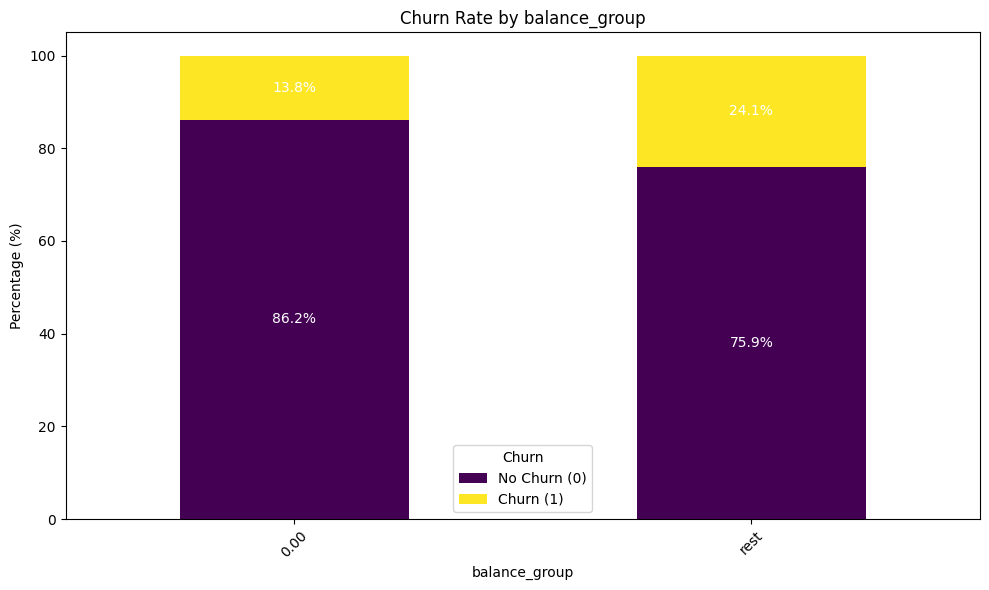

In [120]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 그룹화하여 churn 값별 개수 계산
grouped_counts3 = df.groupby('balance_group')['churn'].value_counts().unstack(fill_value=0)

# 비율 계산
grouped_percentage3 = grouped_counts3.div(grouped_counts3.sum(axis=1), axis=0) * 100

# 비율 플롯 생성
plt.figure(figsize=(10, 6))

# Bar plot으로 비율 시각화
grouped_percentage3.plot(kind='bar', stacked=True, colormap='viridis', ax=plt.gca())

# 비율 표시
for i, (index, row) in enumerate(grouped_percentage3.iterrows()):
    for j, value in enumerate(row):
        plt.text(i, row.cumsum().iloc[j] - value / 2, f'{value:.1f}%', ha='center', va='center', color='white')

plt.xlabel('balance_group')
plt.ylabel('Percentage (%)')
plt.title('Churn Rate by balance_group')
plt.legend(title='Churn', labels=['No Churn (0)', 'Churn (1)'])
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [121]:
# 만약 전체 이탈 비율이 14%보다 낮다면, 0인 값에서의 이탈 비율이 더 높으므로 0이 유의미할 수 있습니다.
# 반대로, 전체 이탈 비율이 14%보다 높다면, 0인 데이터에서의 이탈 비율이 더 낮아 0이 의미가 덜할 수 있습니다.

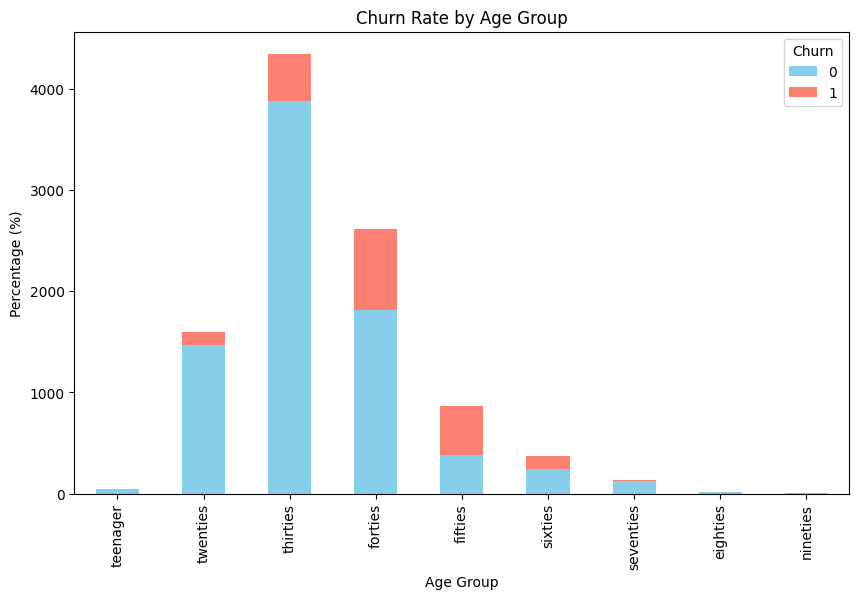

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

# 비율을 플로팅
ax = grouped_counts.plot(kind='bar', stacked=True, figsize=(10, 6), color=['skyblue', 'salmon'])

# 플롯에 제목과 레이블 추가
plt.title('Churn Rate by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Percentage (%)')
plt.legend(title='Churn', labels=['0', '1'])

# 플롯 표시
plt.show()


C:\Users\acy\AppData\Local\Temp\ipykernel_3940\3940168431.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_counts = df.groupby('age_group')['churn'].value_counts().unstack(fill_value=0)


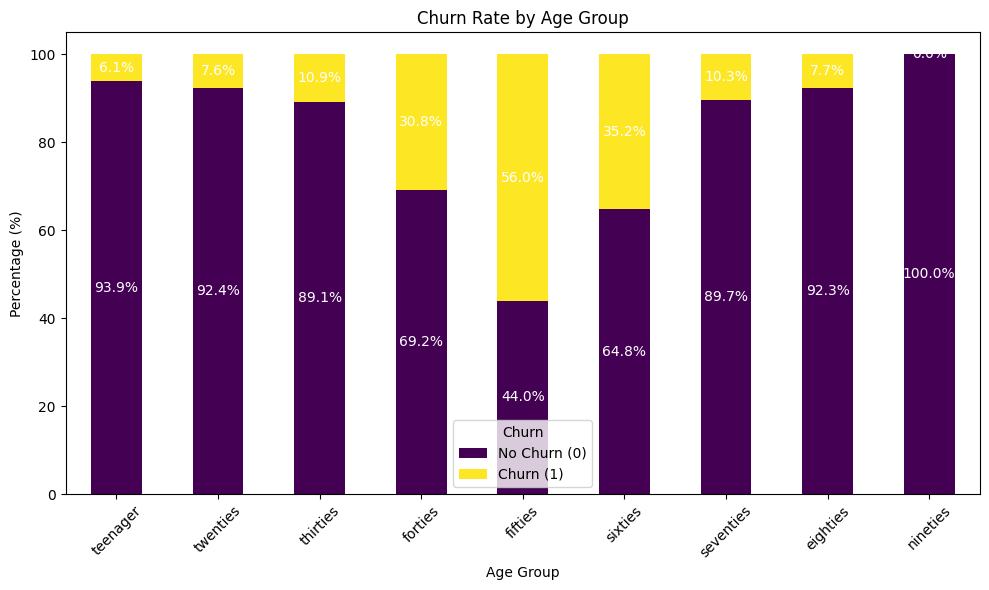

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 그룹화하여 churn 값별 개수 계산
grouped_counts = df.groupby('age_group')['churn'].value_counts().unstack(fill_value=0)

# 비율 계산
grouped_percentage = grouped_counts.div(grouped_counts.sum(axis=1), axis=0) * 100

# 비율 플롯 생성
plt.figure(figsize=(10, 6))

# Bar plot으로 비율 시각화
grouped_percentage.plot(kind='bar', stacked=True, colormap='viridis', ax=plt.gca())

# 비율 표시
for i, (index, row) in enumerate(grouped_percentage.iterrows()):
    for j, value in enumerate(row):
        plt.text(i, row.cumsum().iloc[j] - value / 2, f'{value:.1f}%', ha='center', va='center', color='white')

plt.xlabel('Age Group')
plt.ylabel('Percentage (%)')
plt.title('Churn Rate by Age Group')
plt.legend(title='Churn', labels=['No Churn (0)', 'Churn (1)'])
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [26]:
# 나이대별 평균 잔액, 최소 잔액, 최대 잔액, 총 잔액 계산
grouped = df.groupby('age_group')['balance'].agg(['mean', 'min', 'max', 'sum']).reset_index()

print(grouped)


   age_group           mean        min        max           sum
0   teenager   74393.861633       0.00  176139.50  3.645299e+06
1   twenties   73677.322902       0.00  214346.96  1.172943e+08
2   thirties   75071.796781       0.00  250898.09  3.262620e+08
3    forties   78479.240768       0.00  222267.63  2.054587e+08
4    fifties   83632.942486       0.00  238387.56  7.267703e+07
5    sixties   78058.302667       0.00  187013.13  2.927186e+07
6  seventies   70416.418235       0.00  186445.31  9.576633e+06
7   eighties   32730.885385       0.00  123356.63  4.255015e+05
8   nineties  123794.775000  121513.31  126076.24  2.475895e+05


C:\Users\acy\AppData\Local\Temp\ipykernel_3940\3839468755.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby('age_group')['balance'].agg(['mean', 'min', 'max', 'sum']).reset_index()


In [29]:
df['balance'].value_counts()

balance
0.00         3617
130170.82       2
105473.74       2
129845.26       1
117419.35       1
             ... 
88381.21        1
155060.41       1
57369.61        1
75075.31        1
150725.53       1
Name: count, Length: 6382, dtype: int64

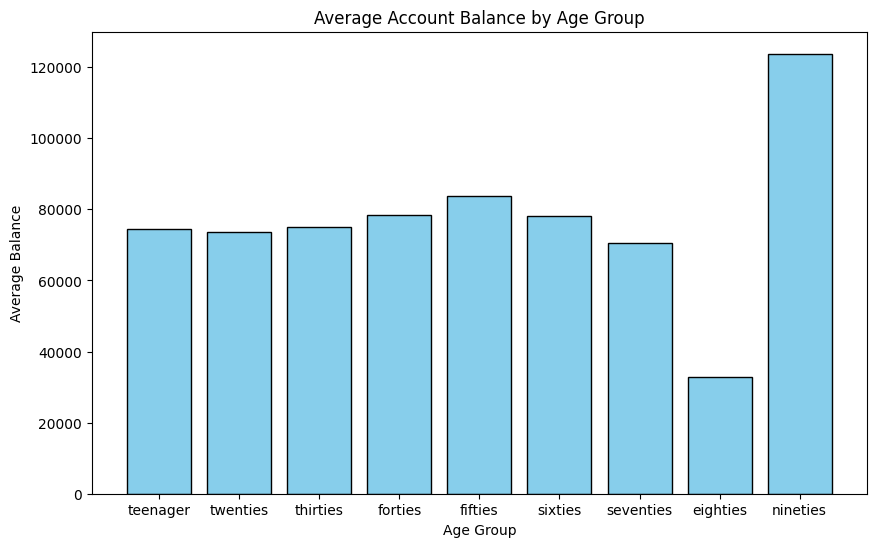

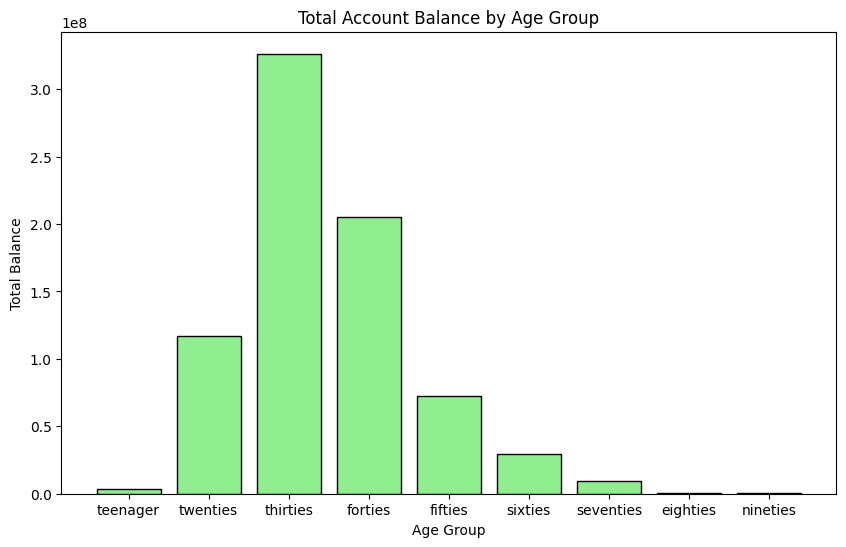

In [27]:
import matplotlib.pyplot as plt

# 나이대별 평균 잔액 시각화
plt.figure(figsize=(10, 6))
plt.bar(grouped['age_group'], grouped['mean'], color='skyblue', edgecolor='black')
plt.xlabel('Age Group')
plt.ylabel('Average Balance')
plt.title('Average Account Balance by Age Group')
plt.show()

# 나이대별 총 잔액 시각화
plt.figure(figsize=(10, 6))
plt.bar(grouped['age_group'], grouped['sum'], color='lightgreen', edgecolor='black')
plt.xlabel('Age Group')
plt.ylabel('Total Balance')
plt.title('Total Account Balance by Age Group')
plt.show()


In [53]:
filtered_data = df[df['balance'] != 0.00]
filtered_data['balance'].value_counts()

balance
130170.82    2
105473.74    2
83199.05     1
129845.26    1
117419.35    1
            ..
88381.21     1
155060.41    1
57369.61     1
75075.31     1
133866.22    1
Name: count, Length: 6381, dtype: int64

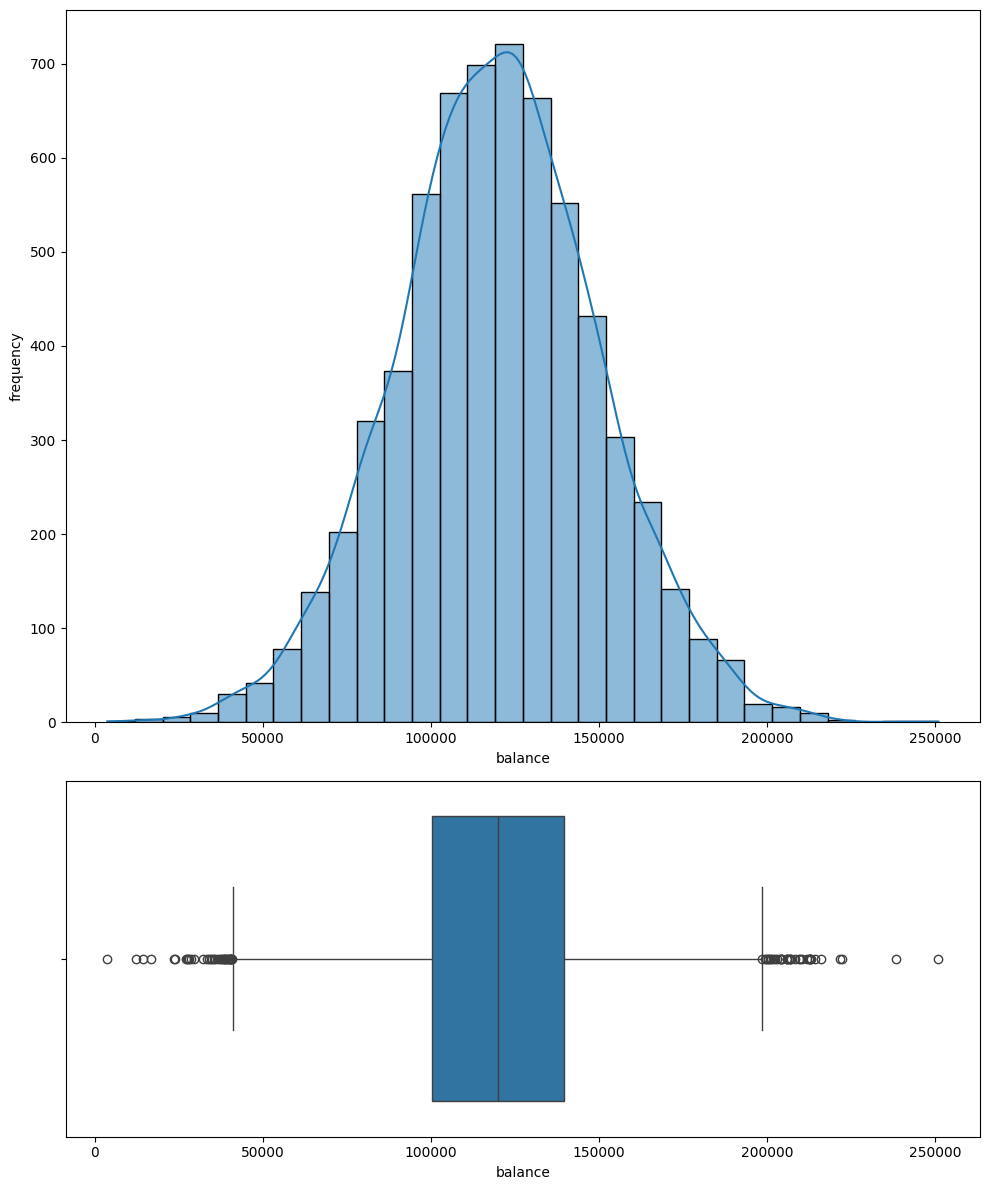

In [67]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


# 값이 -1000이 아닌 데이터만 필터링
filtered_data = df[df['balance'] != 0.00]

# 플롯 설정
fig, axs = plt.subplots(2, 1, figsize=(10, 12), gridspec_kw={'height_ratios': [2, 1]})

# 분포도 (히스토그램 + 커널 밀도 추정) 그리기
sns.histplot(filtered_data['balance'], kde=True, ax=axs[0], bins=30)
# axs[0].set_title('분포도 (히스토그램 + KDE)')
axs[0].set_xlabel('balance')
axs[0].set_ylabel('frequency')

# 박스 플롯 가로로 뉘우기
sns.boxplot(x='balance', data=filtered_data, ax=axs[1])
# axs[1].set_title('박스 플롯 - balance')
# axs[1].set_xlabel('balance')

# 레이아웃 조정
plt.tight_layout()
plt.show()


In [68]:
print(filtered_data['balance'].mean())
print(filtered_data['balance'].median())
# 평균값이랑 중앙값이랑 별 차이가 안 난다

119827.49379288736
119839.69


Series([], Name: count, dtype: int64)


c:\ProgramData\anaconda3\envs\practice_mldl\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:1241: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


ValueError: List of boxplot statistics and `positions` values must have same the length

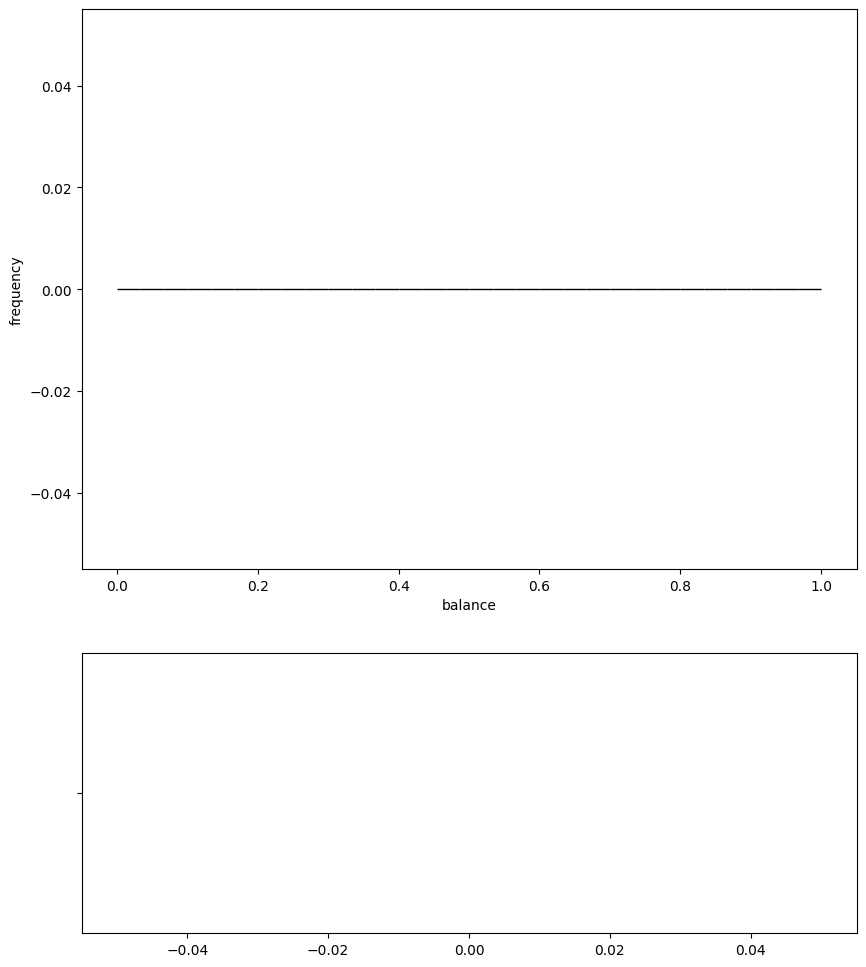

In [89]:
# 값=0.00인 것들 평균으로 대체하기

import pandas as pd
import numpy as np


# 평균값 계산 (0.00 제외)
mean_value = df['balance'][df['balance'] != 0.00].median()

# 값이 0.00인 항목을 평균값으로 대체
df['balance'].replace(0.00, mean_value,inplace=True)

print(df['balance'].value_counts())


# 플롯 설정
fig, axs = plt.subplots(2, 1, figsize=(10, 12), gridspec_kw={'height_ratios': [2, 1]})

# 분포도 (히스토그램 + 커널 밀도 추정) 그리기
sns.histplot(df['balance'], kde=True, ax=axs[0], bins=30)
# axs[0].set_title('분포도 (히스토그램 + KDE)')
axs[0].set_xlabel('balance')
axs[0].set_ylabel('frequency')

# 박스 플롯 가로로 뉘우기
sns.boxplot(x='balance', data=df, ax=axs[1])
# axs[1].set_title('박스 플롯 - balance')
# axs[1].set_xlabel('balance')

# 레이아웃 조정
plt.tight_layout()
plt.show()

# 0이 오류나 결측치라면:

# 0을 평균값이나 중앙값으로 대체하는 것이 좋을 수 있습니다.
# 결측치 대체는 데이터의 일관성을 유지하면서 분석할 수 있는 방법입니다.
# 0이 의미 있는 값이라면:

# 0을 제외하고 분석하는 것이 바람직할 수 있습니다.
# 분석 결과가 0 값을 포함한 데이터와 포함하지 않은 데이터에서 다를 수 있으므로, 이를 명확히 이해하는 것이 중요합니다.


In [83]:
df['balance']=df['balance'].replace(119827.493793, 0.00,inplace=True)

C:\Users\acy\AppData\Local\Temp\ipykernel_3940\3518865067.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['balance']=df['balance'].replace(119827.493793, 0.00,inplace=True)


In [84]:
df['balance'].value_counts()

Series([], Name: count, dtype: int64)